<a href="https://colab.research.google.com/github/gowripreetham/SJSU_Pycaret/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# 📦 Step 1: Install PyCaret (if not installed)
# ==========================================
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade


  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-chtg1wn_
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-chtg1wn_
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ==========================================
# 📦 Step 1: Import and Load Dataset
# ==========================================
from sklearn.datasets import load_wine
import pandas as pd

# Load data as pandas DataFrame
data = load_wine(as_frame=True)
df = data.frame
df['target'] = data.target  # add target column

print("✅ Dataset loaded successfully:", df.shape)
df.head()


✅ Dataset loaded successfully: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# ==========================================
# ⚙️ Step 2: Setup PyCaret Environment
# ==========================================
from pycaret.classification import *

clf = setup(
    data=df,
    target='target',
    session_id=42,
    normalize=True,
    use_gpu=True,
    fold=5
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(178, 14)"
4,Transformed data shape,"(178, 14)"
5,Transformed train set shape,"(124, 14)"
6,Transformed test set shape,"(54, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

In [ ]:
# Check if GPU is connected
!nvidia-smi


Tue Oct 28 07:29:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             25W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# ==========================================
# 🤖 Step 5: Compare Models
# ==========================================
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9840,0.0000,0.9840,0.9861,0.9842,0.9758,0.9767,0.0400
lr,Logistic Regression,0.9837,0.0000,0.9837,0.9859,0.9838,0.9753,0.9763,0.4500
et,Extra Trees Classifier,0.9753,0.9985,0.9753,0.9784,0.9750,0.9628,0.9647,0.2180
qda,Quadratic Discriminant Analysis,0.9680,0.0000,0.9680,0.9695,0.9678,0.9513,0.9522,0.0260
lightgbm,Light Gradient Boosting Machine,0.9673,0.9974,0.9673,0.9712,0.9670,0.9505,0.9528,1.0720
nb,Naive Bayes,0.9597,0.9979,0.9597,0.9636,0.9598,0.9388,0.9407,0.0420
knn,K Neighbors Classifier,0.9593,0.9932,0.9593,0.9654,0.9589,0.9384,0.9420,0.2800
xgboost,Extreme Gradient Boosting,0.9593,0.9918,0.9593,0.9632,0.9589,0.9385,0.9407,0.2240
rf,Random Forest Classifier,0.9513,0.9960,0.9513,0.9571,0.9506,0.9261,0.9297,0.4180
ada,Ada Boost Classifier,0.8953,0.0000,0.8953,0.9017,0.8957,0.8396,0.8421,0.1100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

[2025-10-28 07:29:21.712] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

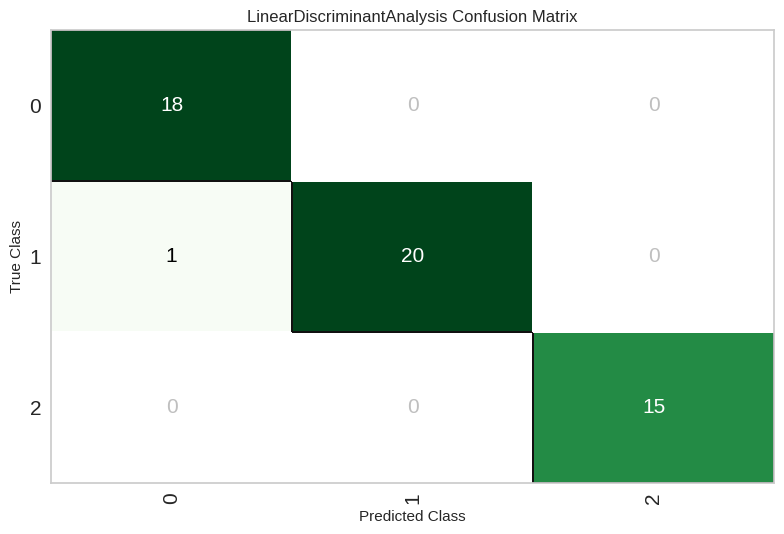

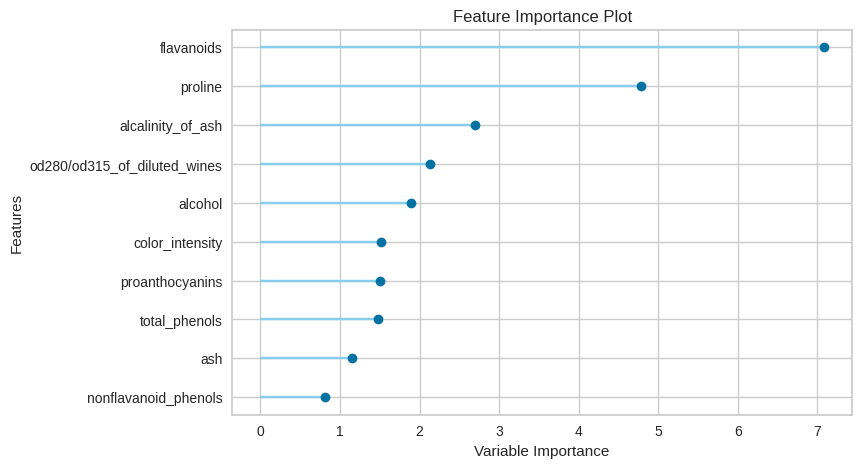

In [ ]:
# ==========================================
# 📊 Step 6: Evaluate Model Performance
# ==========================================
evaluate_model(best)
plot_model(best, plot='confusion_matrix')
plot_model(best, plot='feature')


In [ ]:
# ==========================================
# ⚡ Step 7: Tune and Finalize Model
# ==========================================
tuned = tune_model(best)
final = finalize_model(tuned)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9600,0.0000,0.9600,0.9657,0.9605,0.9393,0.9416
1,0.9600,0.0000,0.9600,0.9650,0.9603,0.9398,0.9420
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9840,0.0000,0.9840,0.9861,0.9842,0.9758,0.9767
Std,0.0196,0.0000,0.0196,0.0170,0.0194,0.0296,0.0285


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# ==========================================
# 🔮 Step 8: Predictions and Saving
# ==========================================
preds = predict_model(final)
preds.head()

save_model(final, 'multiclass_clf_wine_best')
print("✅ Model saved as 'multiclass_clf_wine_best.pkl'")


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Transformation Pipeline and Model Successfully Saved
✅ Model saved as 'multiclass_clf_wine_best.pkl'
